# Encoder_Decoder_Lstm
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading df

In [3]:
df = pd.read_csv('BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034


- dropping

In [4]:
df = df.drop(['Adj Close','Volume','Low','High','Close'], axis=1)
df.head()

,Open
Date,
2022-01-22,36471.589844
2022-01-23,35047.359375
2022-01-24,36275.734375
2022-01-25,36654.804688
2022-01-26,36950.515625


In [5]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[36471.589844],
       [35047.359375],
       [36275.734375],
       [36654.804688],
       [36950.515625]])

### plotting data

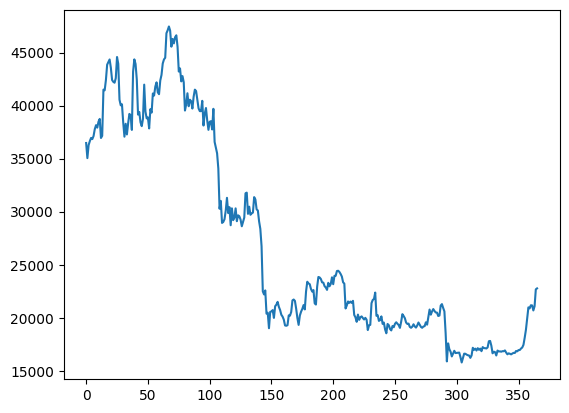

In [6]:
plt.plot(dataset)
plt.show()

### normalizing data

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.65318238]
 [0.60821794]
 [0.64699902]
 [0.65896666]
 [0.66830256]] 

(366, 1)


### Method for making data and timestep

In [8]:
# lookback -> timestep
def create_dataset(dataset, n_step_in, n_step_out):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-n_step_in-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+n_step_in)])
        data_y.append(dataset[i+n_step_in:i+n_step_in+n_step_out])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [9]:
train_size = int(len(dataset) * 0.80)
train , test = dataset[0:train_size] , dataset[train_size:len(dataset)]
print(train.shape)
print(test.shape)

(292, 1)
(74, 1)


In [10]:
train[:8]

array([[0.65318238],
       [0.60821794],
       [0.64699902],
       [0.65896666],
       [0.66830256],
       [0.66487279],
       [0.67391999],
       [0.69451282]])

### Making data train & test x,y

In [12]:
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [13]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(287, 4, 1) (287, 2, 1)
(69, 4, 1) (69, 2, 1)


In [14]:
train_x[:3]

array([[[0.65318238],
        [0.60821794],
        [0.64699902],
        [0.65896666]],

       [[0.60821794],
        [0.64699902],
        [0.65896666],
        [0.66830256]],

       [[0.64699902],
        [0.65896666],
        [0.66830256],
        [0.66487279]]])

In [15]:
for i in range(len(train_x)):   
    print(train_x[i],train_y[i],'\n')

# print(train_x[:5],'\n')
# print(train_y[:5])

[[0.65318238]
 [0.60821794]
 [0.64699902]
 [0.65896666]] [[0.66830256]
 [0.66487279]] 

[[0.60821794]
 [0.64699902]
 [0.65896666]
 [0.66830256]] [[0.66487279]
 [0.67391999]] 

[[0.64699902]
 [0.65896666]
 [0.66830256]
 [0.66487279]] [[0.67391999]
 [0.69451282]] 

[[0.65896666]
 [0.66830256]
 [0.66487279]
 [0.67391999]] [[0.69451282]
 [0.70623209]] 

[[0.66830256]
 [0.66487279]
 [0.67391999]
 [0.69451282]] [[0.70623209]
 [0.69891907]] 

[[0.66487279]
 [0.67391999]
 [0.69451282]
 [0.70623209]] [[0.69891907]
 [0.71664572]] 

[[0.67391999]
 [0.69451282]
 [0.70623209]
 [0.69891907]] [[0.71664572]
 [0.72491573]] 

[[0.69451282]
 [0.70623209]
 [0.69891907]
 [0.71664572]] [[0.72491573]
 [0.66812226]] 

[[0.70623209]
 [0.69891907]
 [0.71664572]
 [0.72491573]] [[0.66812226]
 [0.67457731]] 

[[0.69891907]
 [0.71664572]
 [0.72491573]
 [0.66812226]] [[0.67457731]
 [0.81198126]] 

[[0.71664572]
 [0.72491573]
 [0.66812226]
 [0.67457731]] [[0.81198126]
 [0.81007565]] 

[[0.72491573]
 [0.66812226]
 [0.

### training model

In [16]:
n_features = train_x.shape[2]
n_features

1

In [18]:
#stack lstm
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape=(n_step_in,n_features)))   
model.add(RepeatVector(n_step_out))   
model.add(LSTM(50,activation = 'relu',return_sequences=True))   
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam',loss='mse')   

In [19]:
#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=50, shuffle=False, batch_size=2)

Epoch 1/50
144/144 [==============================] - 4s 5ms/step - loss: 0.1121
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0253
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0171
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0144
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0117
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0080
Epoch 8/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0074
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0068
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0069
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0066
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0065
Epoch 13/50
144/144 [====

### saving model

In [20]:
model.save('savedata')

INFO:tensorflow:Assets written to: savedata/assets


INFO:tensorflow:Assets written to: savedata/assets


In [ ]:
# loading model
new_model = tf.keras.models.load_model('savedata')

### Testing model

In [21]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

3/3 [==============================] - 0s 4ms/step


In [22]:
print('predicted y(train):', predict_train[:2],'\n')
print('real y(train):', train_y[:2])

predicted y(train): [[[0.5244241 ]
  [0.5323451 ]]

 [[0.53194475]
  [0.5395404 ]]] 

real y(train): [[[0.66830256]
  [0.66487279]]

 [[0.66487279]
  [0.67391999]]]


### we reshape it


In [23]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(287, 2, 1)
(69, 2, 1)
(287, 2, 1)
(69, 2, 1)


In [24]:
predict_train = predict_train.reshape(-1,2)
predict_test = predict_test.reshape(-1,2)
train_y = train_y.reshape(-1,2)
test_y = test_y.reshape(-1,2)

In [25]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(287, 2)
(69, 2)
(287, 2)
(69, 2)


In [26]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform(train_y)

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform(test_y)

In [27]:
print(predict_train[:5])

[[32393.22  32644.12 ]
 [32631.436 32872.023]
 [32746.814 32985.516]
 [32892.586 33123.918]
 [33198.86  33411.312]]


### creating df and plotting

In [28]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,32393.220703,36950.515625
1,32644.119141,36841.878906
2,32631.435547,36841.878906
3,32872.023438,37128.445313
4,32746.814453,37128.445313


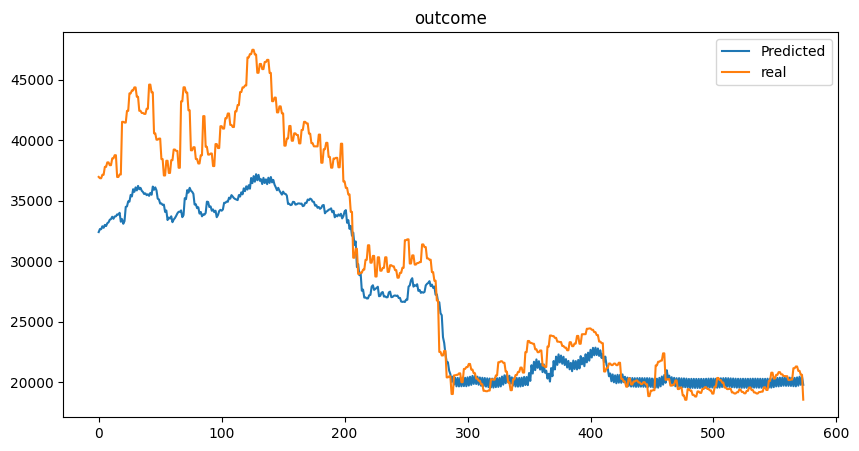

In [29]:
#train
Answer1.plot(title="outcome", figsize=(10,5));

In [ ]:
# xx2 = test_x.reshape(-1,1)
# xx2 = scaler.inverse_transform(xx2)
# xx2[:8]

In [30]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,20102.998047,16352.028320
1,19271.492188,16617.484375
2,20104.343750,16617.484375
3,19273.539062,16884.341797
4,20089.476562,16884.341797


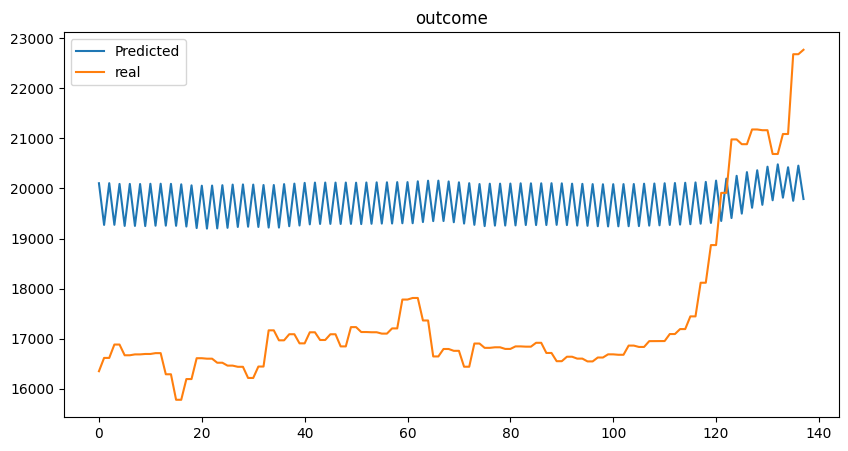

In [31]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

### Evaluate the model

In [32]:
model.evaluate(test_x, test_y)

3/3 [==============================] - 0s 4ms/step - loss: 0.0075


0.007507014088332653

In [33]:
train_score = math.sqrt(mean_squared_error(trainy,predict_train))
print('rmse ', train_score)
test_score = math.sqrt(mean_squared_error(test_y,predict_test))
print('rmse ', test_score)

rmse  4047.208711714577
rmse  19727.040536340275


### new testing
- we must change dim

In [34]:
test_x.shape , test_y.shape

((69, 4, 1), (69, 2))

In [35]:
test_ = array([[0.65318238, 0.60821794, 0.64699902, 0.65896666]])
test_ = test_.reshape(1,n_step_in,n_features)


print(test_.shape,'\n')
print(test_)

(1, 4, 1) 

[[[0.65318238]
  [0.60821794]
  [0.64699902]
  [0.65896666]]]


In [36]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 21ms/step


array([[[0.5244241],
        [0.5323451]]], dtype=float32)

In [38]:
y_hat = y_hat.reshape(-1,1)

In [39]:
y_hat.shape

(2, 1)

In [40]:
y_hat

array([[0.5244241],
       [0.5323451]], dtype=float32)

In [41]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[32393.22],
       [32644.12]], dtype=float32)